In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import glob
from tqdm import tqdm

path = '../data/raw/'
files = glob.glob(path + '*')
users = set()
global_user_action_count = None

for file_ in tqdm(files[:7]):  
    with open(file_) as f:
        file_content = f.read()
    file_content = file_content.rstrip()
    file_content = file_content.replace('}\n{', '},{')
    file_content = "[{}]".format(file_content)

    try:
        df = pd.read_json(file_content)
    except ValueError as e:
        print("{} is too large for my memory :-(".format(file_))
        pass
    user_action_count = df.groupby('by').count()['id']
    if global_user_action_count is None:
        global_user_action_count = user_action_count
    else:
        global_user_action_count = global_user_action_count.add(user_action_count, fill_value=0)
    
    # Throw away users with fewer than 3 actions
    global_user_action_count = global_user_action_count[global_user_action_count > 2]

 86%|████████▌ | 6/7 [01:25<00:14, 14.19s/it]

../data/raw/HN_2012 is too large for my memory :-(


100%|██████████| 7/7 [02:03<00:00, 17.71s/it]


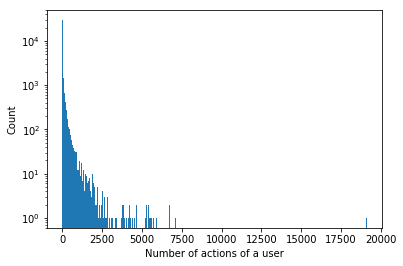

In [2]:
# Plot user action distribution
global_user_action_count.hist(grid=False, bins=1000)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of actions of a user')
plt.ylabel('Count')
plt.show()